In [38]:
import pandas as pd

# 1. 定义文件路径（需与导出时的路径一致，若在当前目录则直接用文件名）
path_X = 'X_selected.csv'
path_Y = 'Y.csv'

# 2. 导入数据（处理可能的编码问题和缺失值提示）
try:
    # 尝试用utf-8-sig编码导入（匹配导出时的编码）
    X_selected = pd.read_csv(path_X, encoding='utf-8-sig')
    Y = pd.read_csv(path_Y, encoding='utf-8-sig')
    
    # 验证导入结果
    print(f"成功导入 X_selected（形状：{X_selected.shape}）")
    print(f"成功导入 Y（形状：{Y.shape}）")
    
    # 预览前3行数据
    print("\nX_selected 前3行：")
    print(X_selected.head(3))
    
    print("\nY 前3行：")
    print(Y.head(3))

except FileNotFoundError as e:
    print(f"错误：未找到文件，请检查路径是否正确。\n{e}")
except Exception as e:
    print(f"导入失败：可能是编码或文件格式问题。\n{e}")

# 3. （可选）检查X和Y的样本数量是否一致（确保后续建模无问题）
if 'X_selected' in locals() and 'Y' in locals():
    if len(X_selected) != len(Y):
        print(f"\n警告：X_selected（{len(X_selected)}行）与Y（{len(Y)}行）样本数量不一致！")
    else:
        print(f"\n确认：X_selected与Y样本数量一致（均为{len(X_selected)}行）")

X=X_selected

成功导入 X_selected（形状：(79411, 9)）
成功导入 Y（形状：(79411, 1)）

X_selected 前3行：
   建筑面积_数值  供暖评分  房屋年限评分  环线_数值  装修评分  梯户比评分  燃气费评分  楼栋总数评分  城市
0   140.33     0       1    7.0     0      4      0       4   3
1    12.50     0       5    0.0     0      0      3       3  10
2   118.00     0       1   11.0     0      4      0       5   3

Y 前3行：
          Price
0  2.469851e+06
1  1.322813e+05
2  1.071740e+06

确认：X_selected与Y样本数量一致（均为79411行）


In [39]:
import pandas as pd

# 1. 定义文件路径（确保test_data.csv与代码在同一目录，或修改为完整路径）
file_path = 'test_data.csv'

# 2. 导入数据并处理可能的错误
try:
    # 导入CSV文件，指定编码避免中文乱码
    test_data = pd.read_csv(file_path, encoding='utf-8-sig')
    print(f"成功导入 test_data.csv，数据形状：{test_data.shape}（行：{test_data.shape[0]}，列：{test_data.shape[1]}）")
except FileNotFoundError:
    raise FileNotFoundError(f"未找到文件：{file_path}，请检查文件路径是否正确")
except Exception as e:
    raise Exception(f"导入失败：{str(e)}（可能是编码问题，可尝试修改encoding为'gbk'）")

# 3. 定义需要提取的特征列
features_needed = [
    '建筑面积_数值',
    '供暖评分',
    '房屋年限评分',
    '环线_数值',
    '装修评分',
    '梯户比评分',
    '燃气费评分',
    '楼栋总数评分',
    '城市'
]

# 4. 检查特征列是否存在于test_data中
missing_features = [feat for feat in features_needed if feat not in test_data.columns]
if missing_features:
    raise ValueError(f"test_data.csv中缺少以下必要特征：{missing_features}，请检查列名是否正确")

# 5. 拆分X_test（特征）和Y_test（目标变量Price）
X_test = test_data[features_needed].copy()
Y_test = test_data[['Price']].copy()  # 保留二维结构

# 6. 验证拆分结果
print("\n=== 数据拆分结果 ===")
print(f"X_test 形状：{X_test.shape}（特征列数：{len(X_test.columns)}，预期9列）")
print(f"Y_test 形状：{Y_test.shape}（目标变量列数：{len(Y_test.columns)}，预期1列）")

# 7. 预览数据
print("\nX_test 前3行预览：")
print(X_test.head(3))
print("\nY_test 前3行预览：")
print(Y_test.head(3))

成功导入 test_data.csv，数据形状：(20774, 29)（行：20774，列：29）

=== 数据拆分结果 ===
X_test 形状：(20774, 9)（特征列数：9，预期9列）
Y_test 形状：(20774, 1)（目标变量列数：1，预期1列）

X_test 前3行预览：
   建筑面积_数值  供暖评分  房屋年限评分  环线_数值  装修评分  梯户比评分  燃气费评分  楼栋总数评分  城市
0    42.90     0       3    9.0     3      0      4       2   2
1    42.87     3       3    0.0     3      2      5       2   1
2   152.51     0       0   11.0     3      4      0       3   3

Y_test 前3行预览：
          Price
0  3.897208e+05
1  2.710796e+05
2  1.437450e+06


In [40]:
import numpy as np

# 对训练集和测试集的目标变量取对数（加1e-10避免0值导致log(0)错误）
Y_log = np.log1p(Y)  # log1p(x) = log(x + 1)，避免0值且数值更稳定
Y_test_log = np.log1p(Y_test)

In [55]:
import pandas as pd

# 读取处理好的X_new.csv文件
try:
    X_new_loaded = pd.read_csv('X_new.csv', encoding='utf-8-sig')
    
    # 验证读取结果
    print(f"成功读取 X_new.csv，数据形状：{X_new_loaded.shape}（行：{X_new_loaded.shape[0]}，列：{X_new_loaded.shape[1]}）")
    
    # 预览前5行数据
    print("\n数据前5行预览：")
    print(X_new_loaded.head())
    
    # 显示所有特征列名，确认与处理后一致
    print("\n特征列名：")
    print(X_new_loaded.columns.tolist())

except FileNotFoundError:
    print("错误：未找到 X_new.csv 文件，请检查文件是否在当前目录下")
except Exception as e:
    print(f"读取失败：{str(e)}")

X_new= X_new_loaded

成功读取 X_new.csv，数据形状：(34017, 9)（行：34017，列：9）

数据前5行预览：
   建筑面积_数值  供暖评分  房屋年限评分  环线_数值  装修评分  梯户比评分  燃气费评分  楼栋总数评分  城市
0   282.02     3       5    3.0     2      3      5       3   0
1    88.42     5       5    8.0     1      4      5       5   0
2   175.52     5       5    8.0     2      3      5       1   0
3   106.13     4       5   10.0     1      4      5       3   0
4   116.80     5       5    1.0     2      4      5       3   0

特征列名：
['建筑面积_数值', '供暖评分', '房屋年限评分', '环线_数值', '装修评分', '梯户比评分', '燃气费评分', '楼栋总数评分', '城市']



===== 训练 线性回归 模型 =====

===== 训练 Lasso 模型 =====


C:\Users\杨\AppData\Local\Temp\ipykernel_20388\3056985353.py:162: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat(


最优超参数: {'alpha': np.float64(0.0001)}

===== 训练 Ridge 模型 =====
最优超参数: {'alpha': np.float64(0.0001)}

===== 训练 Elastic Net 模型 =====
最优超参数: {'alpha': np.float64(0.0001), 'l1_ratio': 0.1}

各模型参数与系数详情：

----- 线性回归 -----
超参数: 无超参数
截距 (intercept): 12.477679
特征系数（按绝对值排序）:
房屋年限评分     0.107656
装修评分       0.098676
供暖评分       0.080092
梯户比评分      0.050310
环线_数值      0.040782
燃气费评分     -0.039632
楼栋总数评分     0.023358
城市         0.015618
建筑面积_数值    0.008997
Name: 线性回归_系数, dtype: float64

----- Lasso -----
超参数: {'alpha': np.float64(0.0001)}
截距 (intercept): 12.478146
特征系数（按绝对值排序）:
房屋年限评分     0.107625
装修评分       0.098612
供暖评分       0.080036
梯户比评分      0.050251
环线_数值      0.040780
燃气费评分     -0.039561
楼栋总数评分     0.023309
城市         0.015598
建筑面积_数值    0.008998
Name: Lasso_系数, dtype: float64

----- Ridge -----
超参数: {'alpha': np.float64(0.0001)}
截距 (intercept): 12.477679
特征系数（按绝对值排序）:
房屋年限评分     0.107656
装修评分       0.098676
供暖评分       0.080092
梯户比评分      0.050310
环线_数值      0.040782
燃气费评分     -0.039632
楼栋总数评分

C:\Users\杨\AppData\Local\Temp\ipykernel_20388\3056985353.py:196: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="模型", y="MAE", data=test_metrics, palette="Blues_d")
C:\Users\杨\AppData\Local\Temp\ipykernel_20388\3056985353.py:202: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="模型", y="RMAE", data=test_metrics, palette="Greens_d")
C:\Users\杨\AppData\Local\Temp\ipykernel_20388\3056985353.py:208: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="模型", y="调整后R²", data=test_metrics, palette="Oranges_d")


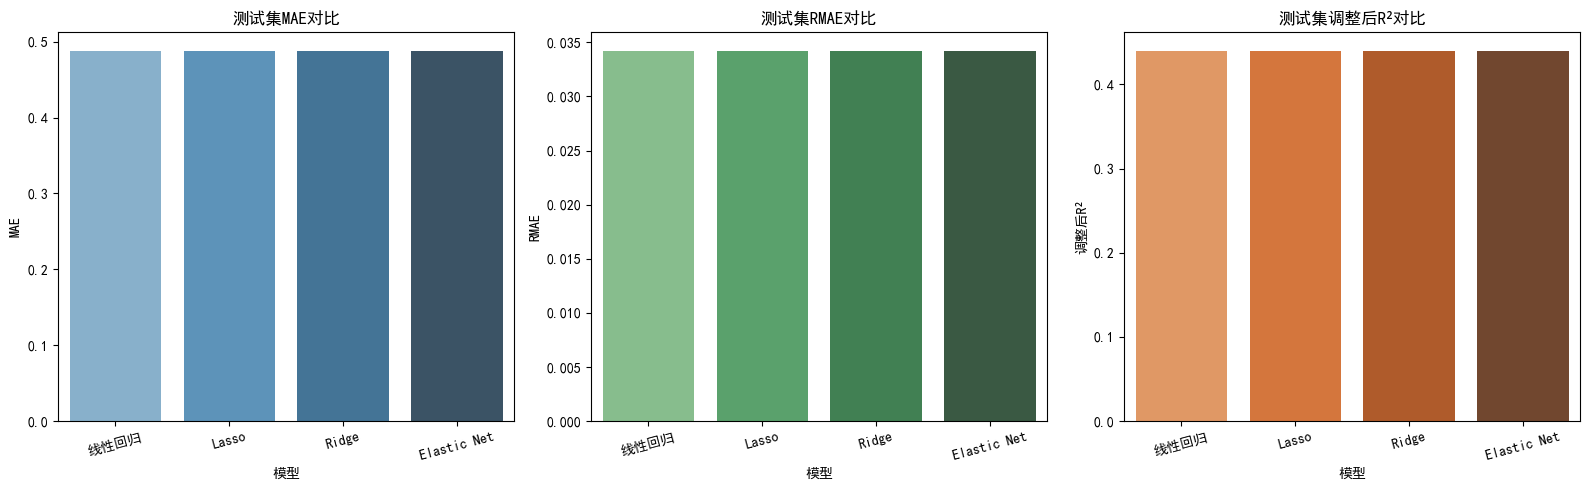


最终预测结果（X_new对应的Y_new_log）：
       线性回归_预测值（Y_new_log）  Lasso_预测值（Y_new_log）  Ridge_预测值（Y_new_log）  \
0                  16.1362               16.1364               16.1362   
1                  14.7568               14.7566               14.7568   
2                  15.4954               15.4955               15.4954   
3                  14.8709               14.8709               14.8709   
4                  14.7786               14.7785               14.7786   
...                    ...                   ...                   ...   
34012              14.2032               14.2032               14.2032   
34013              14.1124               14.1123               14.1124   
34014              13.8132               13.8133               13.8132   
34015              13.8123               13.8124               13.8123   
34016              13.7763               13.7764               13.7763   

       Elastic Net_预测值（Y_new_log）  
0                         16.1363  
1          

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# 设置中文显示
plt.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]
plt.rcParams["axes.unicode_minus"] = False


# ----------------------
# 1. 定义评估指标计算函数
# ----------------------
def adjusted_r2(r2, n, p):
    """计算调整后R²：adjusted_r² = 1 - (1 - r2) * (n-1)/(n-p-1)"""
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

def rmae(y_true, y_pred):
    """计算相对平均绝对误差（RMAE）：MAE / 均值"""
    mae = mean_absolute_error(y_true, y_pred)
    y_mean = np.mean(y_true)
    return mae / y_mean if y_mean != 0 else np.nan  # 避免除以0


# ----------------------
# 2. 数据准备（直接使用现成数据，不做任何处理）
# ----------------------
# 假设以下数据已处理完毕且维度匹配：
# X: 训练集特征矩阵（DataFrame或ndarray）
# Y_log: 训练集对数目标变量（Series或ndarray）
# X_test: 测试集特征矩阵（与X结构一致）
# Y_test_log: 测试集对数目标变量（与Y_log结构一致）
# X_new: 待预测的新特征矩阵（与X结构一致）

# 获取特征名称（适配DataFrame和ndarray）
if hasattr(X, 'columns'):
    feature_names = X.columns.tolist()
else:
    feature_names = [f'特征{i+1}' for i in range(X.shape[1])]
n_features = len(feature_names)  # 特征数量


# ----------------------
# 3. 模型定义与超参数调优（禁用多进程避免中文编码冲突）
# ----------------------
models = {
    "线性回归": LinearRegression(),  # 无超参数模型
    
    "Lasso": GridSearchCV(
        estimator=Lasso(max_iter=10000, random_state=42),
        param_grid={"alpha": np.logspace(-4, 2, 50)},  # 正则化强度参数范围
        cv=5, scoring="neg_mean_absolute_error",
        n_jobs=1  # 单进程运行，避免中文编码冲突
    ),
    
    "Ridge": GridSearchCV(
        estimator=Ridge(max_iter=10000, random_state=42),
        param_grid={"alpha": np.logspace(-4, 2, 50)},
        cv=5, scoring="neg_mean_absolute_error",
        n_jobs=1  # 单进程运行
    ),
    
    "Elastic Net": GridSearchCV(
        estimator=ElasticNet(max_iter=10000, random_state=42),
        param_grid={
            "alpha": np.logspace(-4, 2, 30),  # 正则化强度
            "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]  # L1/L2混合比例
        },
        cv=5, scoring="neg_mean_absolute_error",
        n_jobs=1  # 单进程运行
    )
}


# ----------------------
# 4. 模型训练、评估与参数存储
# ----------------------
# 存储评估指标
metrics_df = pd.DataFrame(columns=["模型", "数据集", "MAE", "RMAE", "R²", "调整后R²"])

# 存储模型参数（超参数、系数、截距）
model_params = {
    "超参数": {},
    "系数": {},
    "截距": {}
}

# 存储最佳模型（用于最终预测）
best_models = {}


for name, model in models.items():
    print(f"\n===== 训练 {name} 模型 =====")
    
    # 确保目标变量为一维数组（适配DataFrame/Series）
    y_train = Y_log.values.ravel() if hasattr(Y_log, 'values') else Y_log
    
    # 训练模型
    if name == "线性回归":
        # 线性回归无超参数，直接训练
        model.fit(X, y_train)
        best_model = model
        best_params = "无超参数"
    else:
        # 正则化模型用GridSearchCV找最优超参数
        model.fit(X, y_train)
        best_model = model.best_estimator_
        best_params = model.best_params_
        print(f"最优超参数: {best_params}")
    
    # 保存最佳模型
    best_models[name] = best_model
    
    # 预测（训练集和测试集）
    y_pred_train = best_model.predict(X)
    y_pred_test = best_model.predict(X_test)
    
    # 提取系数和截距（处理维度和数据类型）
    coefficients = best_model.coef_
    if coefficients.ndim > 1:  # 确保系数为一维
        coefficients = coefficients.flatten()
    coef_series = pd.Series(coefficients, index=feature_names, name=f"{name}_系数")
    
    intercept = best_model.intercept_
    if isinstance(intercept, np.ndarray):  # 确保截距为标量
        intercept = intercept.item()
    
    # 存储参数
    model_params["超参数"][name] = best_params
    model_params["系数"][name] = coef_series
    model_params["截距"][name] = intercept
    
    # 计算训练集指标
    n_train = X.shape[0]
    r2_train = r2_score(y_train, y_pred_train)
    metrics_train = {
        "模型": name,
        "数据集": "训练集",
        "MAE": mean_absolute_error(y_train, y_pred_train),
        "RMAE": rmae(y_train, y_pred_train),
        "R²": r2_train,
        "调整后R²": adjusted_r2(r2_train, n_train, n_features)
    }
    
    # 计算测试集指标
    n_test = X_test.shape[0]
    y_test = Y_test_log.values.ravel() if hasattr(Y_test_log, 'values') else Y_test_log
    r2_test = r2_score(y_test, y_pred_test)
    metrics_test = {
        "模型": name,
        "数据集": "测试集",
        "MAE": mean_absolute_error(y_test, y_pred_test),
        "RMAE": rmae(y_test, y_pred_test),
        "R²": r2_test,
        "调整后R²": adjusted_r2(r2_test, n_test, n_features)
    }
    
    # 合并指标到结果表
    metrics_df = pd.concat(
        [metrics_df, pd.DataFrame([metrics_train, metrics_test])],
        ignore_index=True
    )


# ----------------------
# 5. 输出模型参数与系数
# ----------------------
print("\n" + "="*80)
print("各模型参数与系数详情：")
print("="*80)
for name in models.keys():
    print(f"\n----- {name} -----")
    print(f"超参数: {model_params['超参数'][name]}")
    print(f"截距 (intercept): {model_params['截距'][name]:.6f}")
    print("特征系数（按绝对值排序）:")
    print(model_params["系数"][name].sort_values(key=abs, ascending=False).round(6))


# ----------------------
# 6. 输出模型评估指标
# ----------------------
print("\n" + "="*80)
print("模型评估指标汇总（MAE、RMAE、R²、调整后R²）：")
print("="*80)
print(metrics_df.round(4))

# 可视化测试集指标
plt.figure(figsize=(16, 5))
test_metrics = metrics_df[metrics_df["数据集"] == "测试集"]

# 子图1：MAE对比（越小越好）
plt.subplot(1, 3, 1)
sns.barplot(x="模型", y="MAE", data=test_metrics, palette="Blues_d")
plt.title("测试集MAE对比")
plt.xticks(rotation=15)

# 子图2：RMAE对比（越小越好）
plt.subplot(1, 3, 2)
sns.barplot(x="模型", y="RMAE", data=test_metrics, palette="Greens_d")
plt.title("测试集RMAE对比")
plt.xticks(rotation=15)

# 子图3：调整后R²对比（越接近1越好）
plt.subplot(1, 3, 3)
sns.barplot(x="模型", y="调整后R²", data=test_metrics, palette="Oranges_d")
plt.title("测试集调整后R²对比")
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()


# ----------------------
# 7. 输出最终预测结果（X_new的预测值）
# ----------------------
# 存储各模型对X_new的预测结果（对数空间）
if hasattr(X_new, 'index'):
    final_predictions = pd.DataFrame(index=X_new.index)
else:
    final_predictions = pd.DataFrame()

for name, model in best_models.items():
    final_predictions[f"{name}_预测值（Y_new_log）"] = model.predict(X_new)

print("\n" + "="*80)
print("最终预测结果（X_new对应的Y_new_log）：")
print("="*80)
print(final_predictions.round(4))

# 保存对数空间预测结果到CSV
final_predictions.to_csv("X_new预测结果（对数空间）.csv", index=False, encoding="utf-8-sig")
print("\n对数空间预测结果已保存至：X_new预测结果（对数空间）.csv")


# ----------------------
# 8. 新增：将对数空间预测值转换回原始空间
# ----------------------
# 假设原始对数转换方式为np.log1p，使用np.expm1逆转换
# 若原始转换为np.log，则替换为np.exp；若为np.log10，则替换为10**
original_predictions = pd.DataFrame(index=final_predictions.index)

for col in final_predictions.columns:
    # 列名调整为原始空间标识
    original_col_name = col.replace("Y_new_log", "Y_new")
    # 逆转换计算
    original_predictions[original_col_name] = np.expm1(final_predictions[col])

# 输出原始空间预测结果
print("\n" + "="*80)
print("最终预测结果（X_new对应的原始空间Y_new）：")
print("="*80)
print(original_predictions.round(4))

# 保存原始空间预测结果到CSV
original_predictions.to_csv("X_new预测结果（原始空间）.csv", index=False, encoding="utf-8-sig")
print("\n原始空间预测结果已保存至：X_new预测结果（原始空间）.csv")